# 1. Generate Data

In [43]:
import os
os.system("python3 build_os-mnist.py --testrun")
os.system("python3 build_os-mnist.py --testrun --fashion")

0

# 2. Load Data

load standard libraries

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

get tf-record parser

In [45]:
def _multimnist_parse_osmnist(example_proto):
    features = {
        "image_left": tf.FixedLenFeature([], tf.string),
        "image_right": tf.FixedLenFeature([], tf.string),
        "label1": tf.FixedLenFeature([], tf.int64),
        "label2": tf.FixedLenFeature([], tf.int64),
        "label3": tf.FixedLenFeature([], tf.int64),
        "occlusion_left": tf.FixedLenFeature([], tf.float32),
        "occlusion_right": tf.FixedLenFeature([], tf.float32),
        "occlusion_avg": tf.FixedLenFeature([], tf.float32),
        "segmap_left": tf.FixedLenFeature([], tf.string),
        "segmap_right": tf.FixedLenFeature([], tf.string),
      }
        

    parsed_features = tf.parse_single_example(example_proto, features)
    
    no_classes = 10
    one_hot = tf.one_hot(parsed_features["label1"], no_classes)
    
    occ1_one_hot = tf.one_hot(parsed_features["label2"], no_classes)
    occ2_one_hot = tf.one_hot(parsed_features["label3"], no_classes)
    n_hot = one_hot + occ1_one_hot + occ2_one_hot

    images_encoded_l =  parsed_features["image_left"]
    images_encoded_r =  parsed_features["image_right"]

    image_decoded_l = tf.image.decode_png(images_encoded_l)
    image_decoded_r = tf.image.decode_png(images_encoded_r)
    
    segmaps_encoded_l =  parsed_features["segmap_left"]
    segmaps_encoded_r =  parsed_features["segmap_right"]

    segmap_decoded_l = tf.image.decode_png(segmaps_encoded_l)
    segmap_decoded_r = tf.image.decode_png(segmaps_encoded_r)

    return image_decoded_l, image_decoded_r, segmap_decoded_l,\
        segmap_decoded_r, n_hot, one_hot, parsed_features["occlusion_left"], parsed_features["occlusion_avg"]


use parser to get to data

In [46]:
ds = tf.data.TFRecordDataset('tfrecord_files/2occ/test/osmnist_test0.tfrecord')
ds = tf.data.TFRecordDataset('osfashionmnist/tfrecord_files/2occ/test/osfashionmnist_test0.tfrecord')

ds = ds.map(_multimnist_parse_osmnist)
ds = ds.batch(100, drop_remainder=True)
iterator = ds.make_initializable_iterator()

sess = tf.Session()
sess.run(iterator.initializer)

# 3. Visualize Data

loop through data and use matplotlib to show its contents

In [47]:
batch = sess.run(iterator.get_next())
left_im = batch[0][0, :, :, 0]
right_im = batch[1][0, :, :, 0]
left_segmap = batch[2][0]
left_bin_segmap = batch[2][0, :, :, 0]
left_bin_segmap = left_bin_segmap > 0
left_bin_segmap = np.asarray(left_bin_segmap, dtype=int)
right_segmap = batch[3][0]
right_bin_segmap = batch[3][0, :, :, 0]
right_bin_segmap = right_bin_segmap > 0
right_bin_segmap = np.asarray(right_bin_segmap, dtype=int)
occlusion_left = batch[-2]
occlusion_avg = batch[-1]

In [48]:
batch[2].shape

(100, 32, 32, 3)

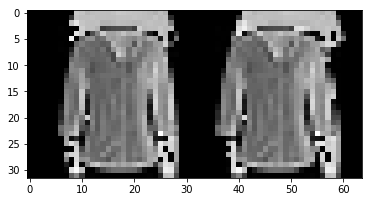

In [49]:
plt.imshow(np.concatenate([left_im, right_im], axis=1), cmap='gray')

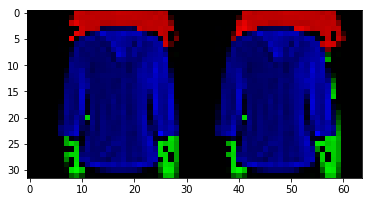

In [50]:
plt.imshow(np.concatenate([left_segmap, right_segmap], axis=1))

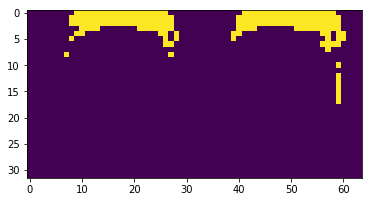

In [51]:
plt.imshow(np.concatenate([left_bin_segmap, right_bin_segmap], axis=1))

avg occlusion: [0.7990762  0.79971987 0.40466103 0.56288034 0.50180835 0.7066381
 0.67767656 0.73237884 0.6576923  0.734      0.783737   0.77530366
 0.77459013 0.7326087  0.75       0.75108224 0.798419   0.76346153
 0.71960783 0.6966527  0.7923387  0.71626985 0.570632   0.62341774
 0.6007533  0.71985817 0.7063008  0.65995526 0.62392426 0.74786323
 0.52907914 0.48752835 0.6921529  0.66595286 0.75       0.7523585
 0.55932206 0.7078313  0.69395465 0.7765432  0.6964286  0.54617834
 0.7987013  0.5233645  0.6983173  0.49034336 0.5206693  0.7751938
 0.72115386 0.71731126 0.5933941  0.5289855  0.5879017  0.5422535
 0.79816514 0.7104167  0.5470852  0.7923729  0.75769234 0.7021739
 0.76037735 0.599537   0.7        0.60315984 0.7282828  0.5856237
 0.7731377  0.7722672  0.75603867 0.41190866 0.6708075  0.6695279
 0.759009   0.7670251  0.7956349  0.7410072  0.755      0.6902357
 0.713615   0.65241635 0.7796935  0.6269841  0.7677262  0.5967742
 0.44357976 0.7746479  0.6632124  0.7239819  0.77840906 

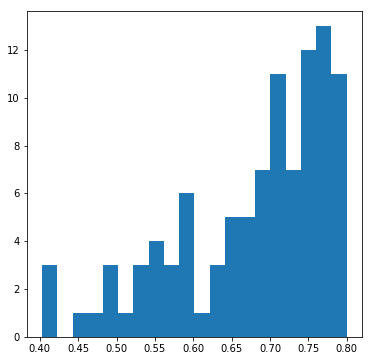

In [52]:
print('avg occlusion: {}'.format(occlusion_avg))
plt.hist(occlusion_avg, bins=20)
plt.show()

In [53]:
# plt.imshow(left_im - right_im)

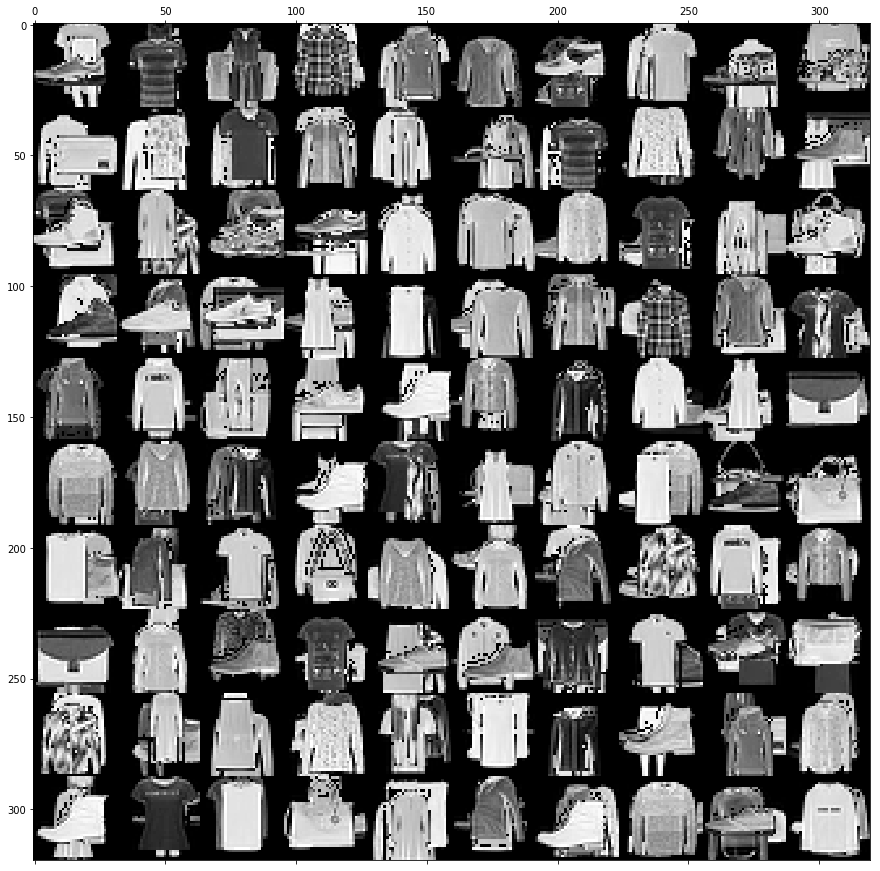

In [33]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15, 15]
plt.matshow(np.concatenate(
    [np.reshape(batch[0][0:10], [320,32]),
     np.reshape(batch[0][10:20], [320,32]),
     np.reshape(batch[0][20:30], [320,32]),
     np.reshape(batch[0][30:40], [320,32]),
     np.reshape(batch[0][40:50], [320,32]),
     np.reshape(batch[0][50:60], [320,32]),
     np.reshape(batch[0][60:70], [320,32]),
     np.reshape(batch[0][70:80], [320,32]),
     np.reshape(batch[0][80:90], [320,32]),
     np.reshape(batch[0][90:100], [320,32])
    ], axis=1), cmap='gray')
mpl.rcParams['figure.figsize'] = [6, 6]